<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis, and Security</h1>

<h2 align='center'>Mid-Semester Exam</h2>

*****

## Instructions

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Duration**            |  **15 min** Reading + **90 min** Typing

* There are two questions.  All answers are to be submitted via gitlab before the end of the exam time period.
* Save your changes frequently, so that you do not lose your work!  Do not change the names of the directories or of the files.
* You can import any additional Python modules you may need for your analysis in the first code block. **DO NOT** try to install any modules other than those present in the Anaconda distribution. 
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.
* You will be marked on **correctness** and **readability** of your code/analysis/explanation. If your marker can't understand your code/analysis/explanation, then marks may be deducted. 
* You may insert additional cells if you wish. Ignore cells if you don't need to use them.

**Several notes on printing and plotting**
* When writing codes to print, your codes should <u>**include the relevant units and/or give relevant description**</u> of what you are printing. 

* A professional plot typically has the following characteristics:

    * Clear and concise labeling: A professional plot should have clear and concise labeling of the x and y axes, as well as a clear title that conveys the purpose of the plot.

    * Appropriate scales: The scales on the x and y axes should be appropriate for the data being presented. This means that the scales should be chosen so that the data is not too compressed or stretched out, and so that important features of the data are easily visible.

    * Appropriate plot type: The plot type should be appropriate for the data being presented. For example, if the data is continuous, a line plot or a scatter plot may be appropriate. If the data is categorical, a bar chart or a pie chart may be more appropriate.

    * Clarity: A professional plot should be visually clear and easy to interpret. This means that unnecessary elements should be removed, colors should be used judiciously, and the plot should be free of clutter.

    * Consistency: A professional plot should be consistent in its formatting with other plots that may be presented in the same report. This means that font sizes, line widths, and colors should be consistent across all plots.


In [1]:
# Imports
# Feel free to import other modules, provided they are a part of the standard conda distribution.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\Andrew Ha\AppData\Local\Temp\ipykernel_6716\3722797865.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from sklearn.metrics import confusion_matrix, mean_squared_error, recall_score, precision_score, pairwise_distances
from sklearn import tree


*****
## Question 1: Short Answer (20 marks)

Answer the following questions in the raw cell left below the question.

    
#### 1.1) Explain the difference between regression and classification in the context of data analysis. Provide examples to explain your answer.
<span style= 'float: right;'><b>[6 marks]</b></span>

#### 1.2) Suppose that we use some simple machine learning method to make a prediction. Describe how we might estimate the standard deviation of our prediction. Justify your answer. 
<span style= 'float: right;'><b>[6 marks]</b></span>

#### 1.3) Assume that you want to check whether the average height of people in city C is greater than that of city S. For this you measure the heights of 400 people from city C and 800 people from city S. Determine which test you might perform and how. If multiple tests apply, please choose one.
<span style= 'float: right;'><b>[8 marks]</b></span>

____
## Question 2: Data Analysis (80 marks)

The data set Au_nanoparticle_dataset.csv is a set of 4000 gold (Au) nanoparticle FINAL CONFIGURATIONS, for use in data-driven studies. These structures have been optimized (fully relaxed) using molecular dynamics with an embedded atom (EAM) interatomic potential, at various temperatures and growth rates. Each nanoparticle has been characterised using a variety of topological features, including size, lattice structure, surface curvature and a number of order parameters. The final two columns are target labels, providing the total energy and the excess formtion energy. Other features can also be used as labels as desired. Some of the major features that relevant to the exam are listed below. 


| Field/Attribute     | Description |
| :-------  | ---------: |
| ID | Unique identifier |
| T   | Temperature, K  |
| tau  | Growth rate, atoms/ns |
| time | Time, ns |
| N_total | Total number of atoms |
| N_bulk | Total number of bulk atoms |
| N_surface | Total number of surface atoms |
| Volume | Total nanoparticle volume, m3 |
| R_min | Nanoparticle radius minimum, Å |
| R_max | Nanoparticle radius maximum, Å |
| R_diff | Nanoparticle radius minimum, Å |
| R_avg | Nanoparticle radius average, Å |
| R_std | Nanoparticle radius standard deviation, Å |
| R_skew | Nanoparticle radius skewness, Å |
|Curve_1‐10 | Atoms with surface curvature angle between 1 and 10 degrees|
|Total_E | Total energy of the nanoparticle from the LAMMPS simulation, eV
|Formation_E | Formation energy of the nanoparticle, eV|
|Avg_total |Order parameters, Average coordination number of all atoms|
|Avg_bulk | Coordination statistics, Average coordination number of all bulk atoms |
|Avg_surf | Coordination statistics, Average coordination number of all surface atoms |
|TCN_0 |Coordination statistics, Number of atoms with coordination number 0|
|Avg_bonds | Bonding statistics, Average bond length, Å|
|Std_bonds | Bonding statistics, Standard Deviation of the bond length, Å|
|Max_bonds | Bonding statistics, Maximum bond length, Å|
|Min_bonds |Bonding statistics, Minimum bond length, Å|
|N_bonds |Bonding statistics, Total number of bonds|
|angle_avg |Bonding statistics, Average bond angle, Degrees|
|angle_std |Bonding statistics, Standard deviations of the bond angle, Degrees|
|FCC | Lattice statistics, Number of atoms in face centred cubic (fcc) lattice|
|HCP | Lattice statistics, Number of atoms in hexagonal closed packed (hcp) lattice|
|ICOS | Lattice statistics, Number of atoms in icosahedral lattice|
|DECA | Lattice statistics, Number of atoms in decahedral lattice|

The questions are as follows:


### 2.0) Import the Data **[5 marks]**
- The data file is called `Au_nanoparticle_dataset.csv` in the data directory.
- The resulting variable containing the dataframe should be called `Au_data` for testing purposes.
- Do not use `ID` as an index. Instead, allow for pandas to create a default index.
- Print out the first 5 rows of the data set along with the names of the columns. 

<span style= 'float: right;'><b>[5 marks]</b></span>

In [3]:
# YOUR CODE HERE
Au_data = pd.read_csv('./Au_nanoparticle_dataset.csv')
Au_data = Au_data[['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume',
       'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'Curve_1-10', 'Avg_total',
       'Avg_bulk', 'Avg_surf', 'TCN_0', 'Avg_bonds', 'Std_bonds', 'Max_bonds',
       'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS',
       'DECA', 'Total_E', 'Formation_E']]

Au_data = Au_data.dropna()
Au_data.head(5)

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,2.37931,8936,95.5363,34.169839,24,23,2,8,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,1.88749,9090,95.5073,34.245992,30,35,1,7,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,1.74535,26399,96.0506,34.609982,700,376,0,17,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,1.70155,40689,96.3417,34.742688,1858,823,0,11,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,1.84250,62641,96.5052,34.859251,3575,1350,0,28,-41427.9010,1597.7390


### 2.1) Centeral Tendency and Varibility **[13 marks]**

#### 2.1.1) 3M: Print the mean, mode (or modes), and median of the total numbers of atoms `N_total` and bulk atoms `N_bulk`.

<span style= 'float: right;'><b>[3 marks]</b></span>

In [4]:
# YOUR CODE HERE

print("Mean:", Au_data[['N_total', 'N_bulk']].mean().astype(str).apply(lambda x: x+ ' # atoms'), sep='\n')
print("Median:", Au_data[['N_total', 'N_bulk']].median().astype(str).apply(lambda x: x+ ' # atoms'), sep='\n')
print("Mode:", Au_data[['N_total', 'N_bulk']].mode().astype(str).apply(lambda x: x+ ' # atoms'), sep='\n')

Mean:
N_total    3476.659164791198 # atoms
N_bulk     2521.484371092773 # atoms
dtype: object
Median:
N_total    1865.0 # atoms
N_bulk     1199.0 # atoms
dtype: object
Mode:
        N_total         N_bulk
0  1150 # atoms  212.0 # atoms
1  1163 # atoms  287.0 # atoms
2  1415 # atoms    nan # atoms


#### 2.1.2) Range, variance, standard deviation

- Print the range, variance, standard deviation of the total numbers of atoms `N_total` and bulk atoms `N_bulk`. **(3 marks)**
- Draw a side-by-side box plot for total numbers of atoms `N_total` and bulk atoms `N_bulk`. **(2 marks)**

<span style= 'float: right;'><b>[5 marks]</b></span>

In [5]:
# YOUR CODE HERE
q212 = Au_data[['N_total', 'N_bulk']]

print("Range:", (q212.max()-q212.min()).astype(str).apply(lambda x: x+ ' # atoms'), sep='\n')
print()
print("Variance:", (q212.var()).astype(str).apply(lambda x: x+ ' # atoms^2'), sep='\n')
print()
print("Standard Deviation:", (q212.std()).astype(str).apply(lambda x: x+ ' # atoms^2'), sep='\n')

Range:
N_total    14041 # atoms
N_bulk     11491 # atoms
dtype: object

Variance:
N_total    13540472.237229034 # atoms^2
N_bulk       8860157.88163412 # atoms^2
dtype: object

Standard Deviation:
N_total     3679.738066388562 # atoms^2
N_bulk     2976.6017337954568 # atoms^2
dtype: object


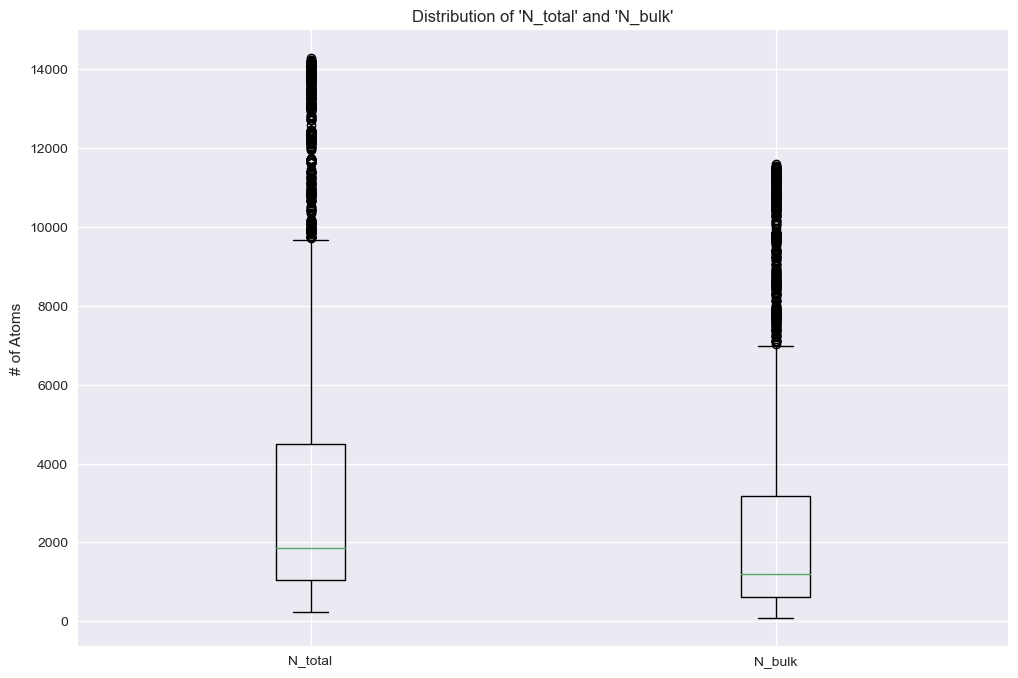

In [6]:
plt.figure(figsize=(12,8))
plt.boxplot(q212, labels=q212.columns)
plt.title("Distribution of 'N_total' and 'N_bulk'")
plt.ylabel('# of Atoms')
plt.show()

#### 2.1.3) Counting

- Print the values of `N_total` of the nanoparticles where the nanoparticles have formation energy `Formation_E` over 800 eV?


<span style= 'float: right;'><b>[5 marks]</b></span>

In [7]:
# YOUR CODE HERE

#solution 1:
print(np.sum(Au_data['N_total'][Au_data['Formation_E'] > 800]), " # of atoms")

#solution 2:
pd.DataFrame(Au_data[Au_data["Formation_E"] > 800]["N_total"], columns=["N_total"])

10291717  # of atoms


,N_total
2,4637
3,7189
4,11004
5,13375
6,13795
...,...
3988,3800
3989,4322
3996,2315
3997,2764


### 2.2) Correlation **[10 marks]**

#### 2.2.1) Explore the correlation of `N_surface` total number of surface atoms and `Formation_E` formation energy, you need to:
- Draw an appropriate scatter plot. **(3 marks)**
- Print the correlation coefficient. **(2 marks)**

<span style= 'float: right;'><b>[5 marks]</b></span>

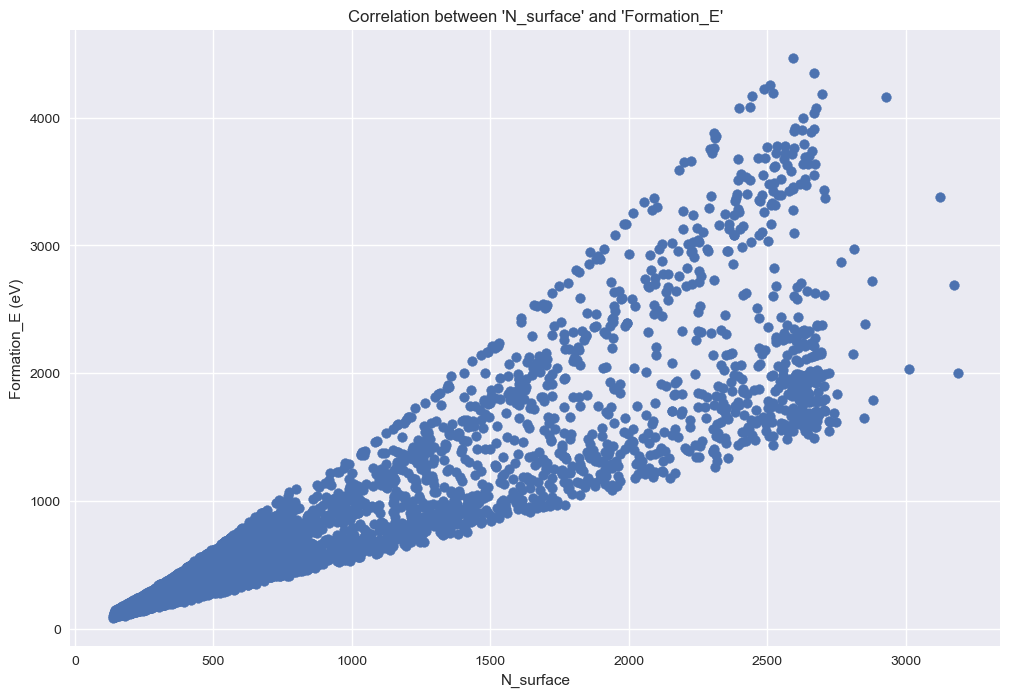

Correlation Coeficient:  0.887304276344374


In [8]:
# YOUR CODE HERE
plt.figure(figsize=(12,8))
plt.scatter(Au_data['N_surface'], Au_data['Formation_E'])
plt.title("Correlation between 'N_surface' and 'Formation_E'")
plt.xlabel('N_surface')
plt.ylabel('Formation_E (eV)')
plt.show()

print("Correlation Coeficient: ",Au_data['Formation_E'].corr(Au_data["N_surface"]))

#### 2.2.2) Which of the following feature has strongest correlation with the formation energy? Justify your answer by printing all the relevant correlation coefficients.
- temperature `T`
- growth rate `tau`
- total nanoparticle volume `Volume`
- average bond length `Avg_bonds`
- average bond angle `angle_avg`

<span style= 'float: right;'><b>[5 marks]</b></span>

In [9]:
# YOUR CODE HERE
print("Pearson Correlation Coefficient with 'Formation_E':")
Au_data[['T', 'tau', 'Volume', 'Avg_bonds', 'angle_avg','Formation_E']].corr(method='pearson')['Formation_E']

Pearson Correlation Coefficient with 'Formation_E':


T              0.248701
tau           -0.032021
Volume         0.906165
Avg_bonds      0.417150
angle_avg      0.477338
Formation_E    1.000000
Name: Formation_E, dtype: float64

### 2.3) Linear regression **[10 marks]**

*Hint: you do not need to split the data into training set and testing set for all the tasks in question 2.3.*

#### 2.3.1) Build a linear regression model using `Volume` (total nanoparticle volume) as the predictor and `Formation_E` (formation energy) as the response variable; draw an appropriate plot to visualise the model.
<span style= 'float: right;'><b>[4 marks]</b></span>

[]

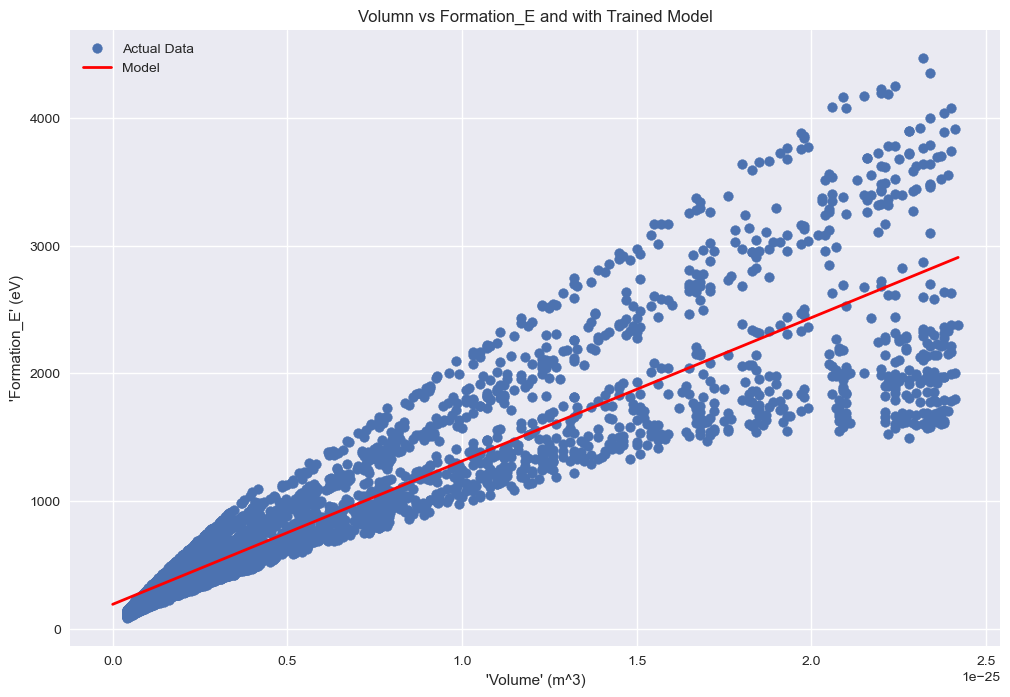

In [10]:
# YOUR CODE HERE
# drop rows will null value
q231 = Au_data[['Volume', 'Formation_E']].dropna()
# fit the model
lr231 = LinearRegression().fit(q231[['Volume']], q231['Formation_E'])

plt.figure(figsize=(12,8))
plt.scatter(q231['Volume'], q231['Formation_E'], label='Actual Data')
x = np.array([0, q231['Volume'].max()])
plt.plot(x, lr231.predict(x.reshape(-1,1)), c='r', linewidth=2, label='Model')
plt.xlabel("'Volume' (m^3)")
plt.ylabel("'Formation_E' (eV)")
plt.title('Volumn vs Formation_E and with Trained Model')
plt.legend(loc='best')
plt.plot()


correct model: 2 marks

correct plot values: 0.5 mark
correct title: 0.5 mark
correct legend: 0.5 mark
correct x and y label: 0.25 mark each

#### 2.3.2) Build a linear regression model using `N_total` (total number of atoms) as the predictor and `Formation_E` (formation energy) as the response variable; draw an appropriate plot to visualise the model.
<span style= 'float: right;'><b>[4 marks]</b></span>

[]

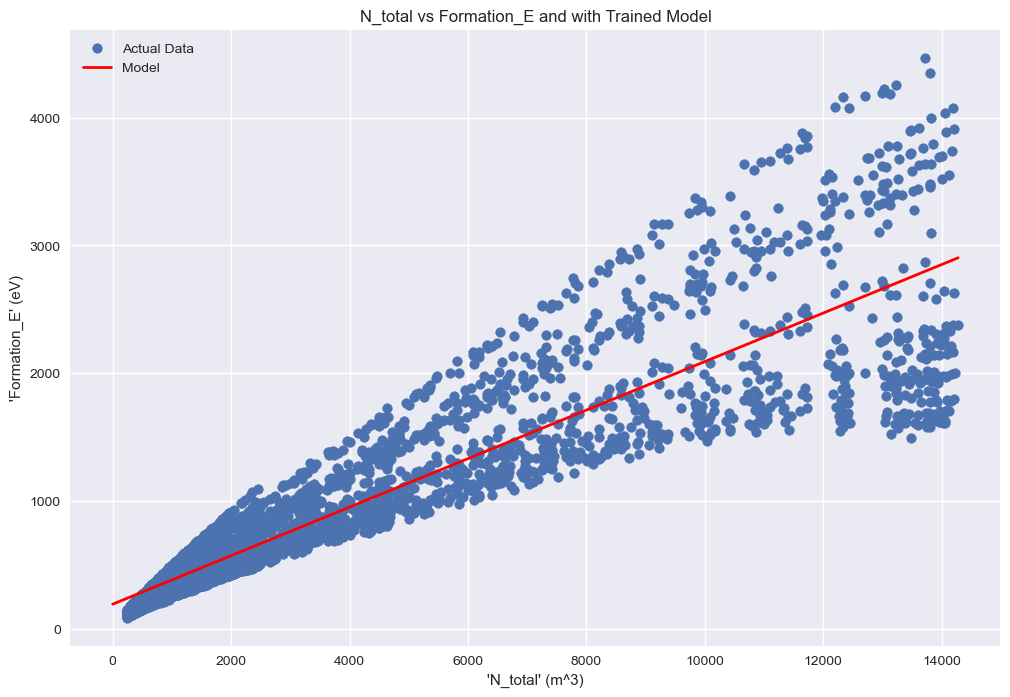

In [11]:
# YOUR CODE HERE
# drop rows will null value
q232 = Au_data[['N_total', 'Formation_E']].dropna()
# fit the model
lr232 = LinearRegression().fit(q232[['N_total']], q232['Formation_E'])

plt.figure(figsize=(12,8))
plt.scatter(q232['N_total'], q232['Formation_E'], label='Actual Data')
x = np.array([0, q232['N_total'].max()])
plt.plot(x, lr232.predict(x.reshape(-1,1)), c='r', linewidth=2, label='Model')
plt.xlabel("'N_total' (m^3)")
plt.ylabel("'Formation_E' (eV)")
plt.title('N_total vs Formation_E and with Trained Model')
plt.legend(loc='best')
plt.plot()


#### 2.3.3) Discuss which one, `Volume` (total nanoparticle volume) or `N_total` (total number atoms), would characterise better the formation energy in the given data set. Hint: you need to evaluate models' performance. 
<span style= 'float: right;'><b>[2 marks]</b></span>


In [12]:
# YOUR CODE HERE
true_y = q231["Formation_E"]
print("Volume model:")
print(f'Testing R^2 value: {lr231.score(np.array(q231["Volume"]).reshape(-1,1), true_y)}')
print(f'Testing RMSE value: {np.sqrt(mean_squared_error(lr231.predict(np.array(q231["Volume"]).reshape(-1,1)), true_y))}')

print("Total number of atoms:")
print(f'Testing R^2 value: {lr232.score(np.array(q232["N_total"]).reshape(-1,1), true_y)}')
print(f'Testing RMSE value: {np.sqrt(mean_squared_error(lr232.predict(np.array(q232["N_total"]).reshape(-1,1)), true_y))}')


Volume model:
Testing R^2 value: 0.8211348171317105
Testing RMSE value: 326.1925530994265
Total number of atoms:
Testing R^2 value: 0.8210892346676577
Testing RMSE value: 326.23411432704034


### 2.4) Decision tree **[20 marks]**

#### 2.4.1) 

- Create a new column: label "Yes" if the formation energy of the nanoparticle is greater than or equal to the average formation energy of the dataset otherwise label "No". 
- Choose the attribute `HCP` and four other attributes (any four that are valid) and 
- Build a decision tree to determine if a nanoparticle has formation energy less than the average.
- Evaluate the performance of the decision tree. You are required to print the Mean Accuracy, Recall, and Precision of the model on both the training and testing sets.

<span style= 'float: right;'><b>[14 marks]</b></span>

Whenever applicable, you need to:

- encode categorical variables to appropriate forms.

- handle the missing values appropriately if there are any.

- drop unwanted features if necessary.

- split the dataset to train and test sets. You may choose whatever test/train split you wish but be sure to explicitly state what you have chosen.

- justify each transformation/modification you performed.

In [13]:
# YOUR CODE HERE
avg=Au_data['Formation_E'].mean()
Au_data['GTAvg'] = Au_data['Formation_E']>=avg
Au_data['GTAvg'] = Au_data['GTAvg'].astype(str).map({'False': 'No', 'True':'Yes'})
q24 = Au_data[['Volume', 'N_bulk', 'N_bonds', 'R_avg', 'HCP', 'GTAvg']]
q24

,Volume,N_bulk,N_bonds,R_avg,HCP,GTAvg
0,2.710000e-26,1014,8936,17.3706,23,No
1,2.780000e-26,1034,9090,17.6061,35,No
2,7.850000e-26,3365,26399,25.3692,376,No
3,1.220000e-25,5292,40689,29.7011,823,Yes
4,1.860000e-25,8508,62641,34.2831,1350,Yes
...,...,...,...,...,...,...
3994,2.030000e-26,683,6181,16.7874,0,No
3995,2.550000e-26,950,7923,17.4079,0,No
3996,3.920000e-26,1469,12167,21.2937,0,No
3997,4.680000e-26,1905,14805,21.4990,0,Yes


In [14]:
le = LabelEncoder()
q24['GTAvg'] = le.fit_transform(q24['GTAvg'])
train, test = train_test_split(q24, test_size=.2)

dt = DecisionTreeClassifier(max_depth=3).fit(train.iloc[:,:-1], train.iloc[:,-1])
ypredtrain = dt.predict(train.iloc[:,:-1])
ypredtest = dt.predict(test.iloc[:,:-1])
print('Training Mean Accuracy:', dt.score(train.iloc[:,:-1], train.iloc[:,-1]))
print('Testing Mean Accuracy:', dt.score(test.iloc[:,:-1], test.iloc[:,-1]))
print('Training Recall:', recall_score(train.iloc[:,-1], ypredtrain))
print('Testing Recall', recall_score(test.iloc[:,-1], ypredtest))
print('Training Precision:', precision_score(train.iloc[:,-1], ypredtrain))
print('Testing Precision', precision_score(test.iloc[:,-1], ypredtest))

Training Mean Accuracy: 0.9543607377305408
Testing Mean Accuracy: 0.96
Training Recall: 0.8858230256898192
Testing Recall 0.896
Training Precision: 0.9728317659352143
Testing Precision 0.9739130434782609


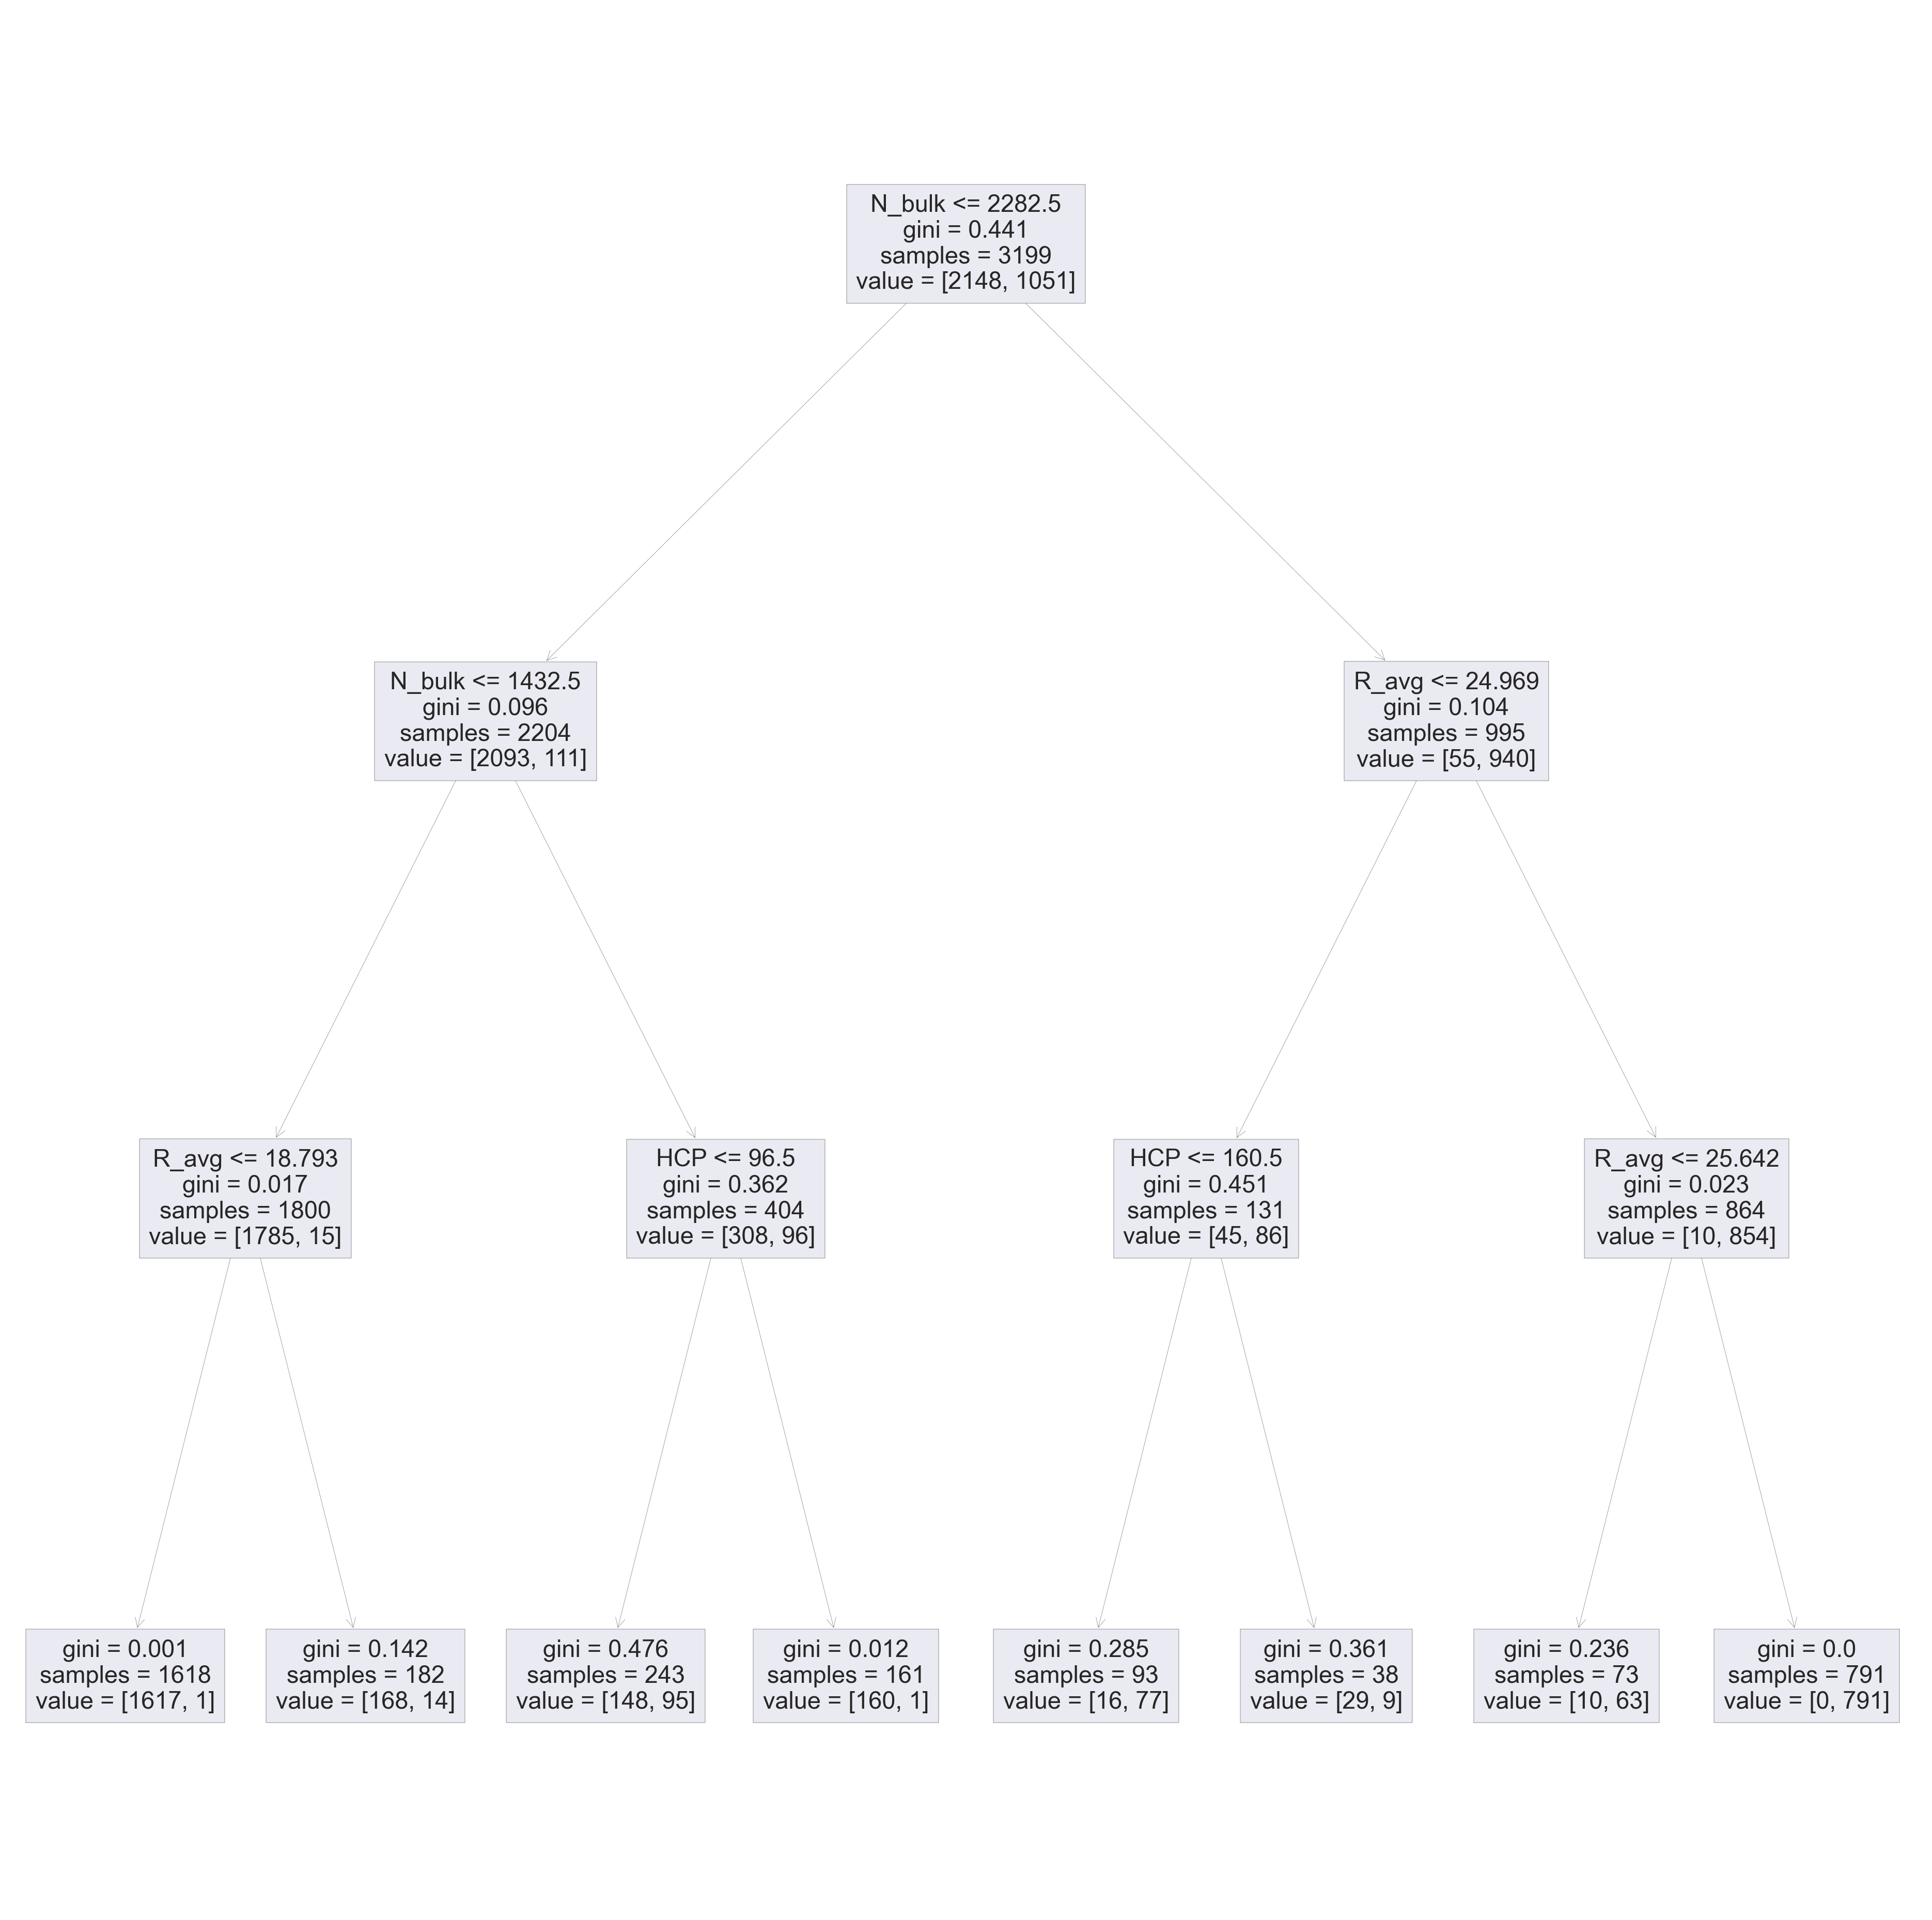

In [15]:
plt.figure(figsize=(48,48))  # set plot size (denoted in inches)
tree.plot_tree(dt, feature_names = train.columns[:-1])
plt.plot()
plt.savefig('tree.png',dpi=100)
plt.show()

#### 2.4.2) On the testing set, calculate and print:
- the Gini impurity of the labels
<span style= 'float: right;'><b>[2 marks]</b></span>
- the total Gini gain of your decision tree.
<span style= 'float: right;'><b>[4 marks]</b></span>


In [16]:
# YOUR CODE HERE

label_gini = 0
for y in test['GTAvg'].unique():
    pc = sum(test['GTAvg']==y)/len(test)
    label_gini += pc * (1-pc)
print(f'Gini Impurity of the Labels: {label_gini:.4f}')

leaf_id = dt.apply(test.iloc[:,:-1])
prob_positive = dt.predict_proba(test.iloc[:,:-1])[:,0]
dt_gini = 0
for leaf_node in np.unique(leaf_id):
    num_of_sample = sum(leaf_id == leaf_node)
    pc = sum(prob_positive[leaf_id == leaf_node])/num_of_sample
    dt_gini += (pc * (1-pc)) * num_of_sample/len(test)

print(f'Gini Impurity of the Labels: {dt_gini:.4f}')
print(f'Total Gini gain: {label_gini:.4f} - {dt_gini:.4f} = {label_gini-dt_gini:.4f}')


Gini Impurity of the Labels: 0.4297
Gini Impurity of the Labels: 0.0281
Total Gini gain: 0.4297 - 0.0281 = 0.4016


### 2.5) Clustering **[22 marks]**

#### 2.5.1) Assume that the objects to be clustered are the two-dimensional vectors consisting of `Total_E` total energy and `Formation_E` formation energy. Set **k = 5**, design and implement a K-means clustering algorithm to cluster the data set. Draw an appropriate plot to visualise the model.

<span style= 'float: right;'><b>[14 marks]</b></span>


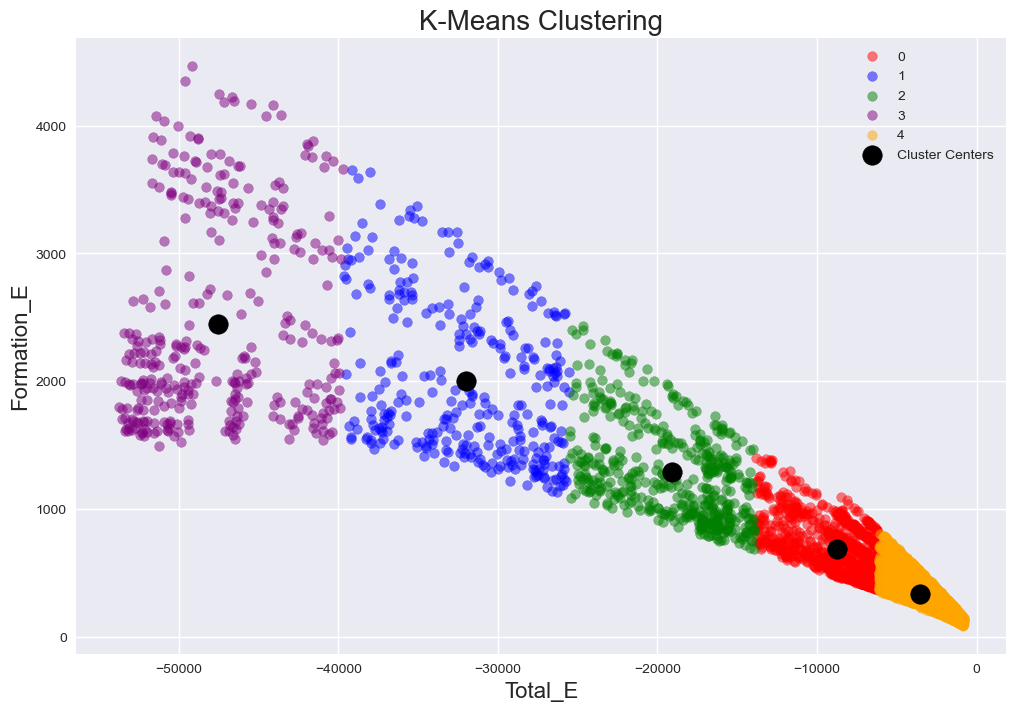

In [17]:
# YOUR CODE HERE
q25 = Au_data[['Total_E', 'Formation_E']]
km = KMeans(n_clusters=5).fit(q25)

colors=["red","blue","green","purple","orange"]
clus = km.predict(q25)

# plotting with different coloured clusters and showing cluster centres
plt.figure(figsize=(12,8))
for i in range(5):
   plt.scatter(q25['Total_E'][clus==i], q25['Formation_E'][clus==i], label=i, c=colors[i], alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means Clustering",size=20)
plt.xlabel('Total_E', size=16)
plt.ylabel('Formation_E', size=16)
plt.legend()
plt.show()

#### 2.5.2) *For COMP2420 Students*: Use the Elbow method that we covered in Lecture 10 to find the optimal **k**. Show the plot of total of the within cluster sum of squares with respect to **k**. (Marks will not be counted unless you are a COMP2420 student)
<span style= 'float: right;'><b>[8 marks]</b></span>


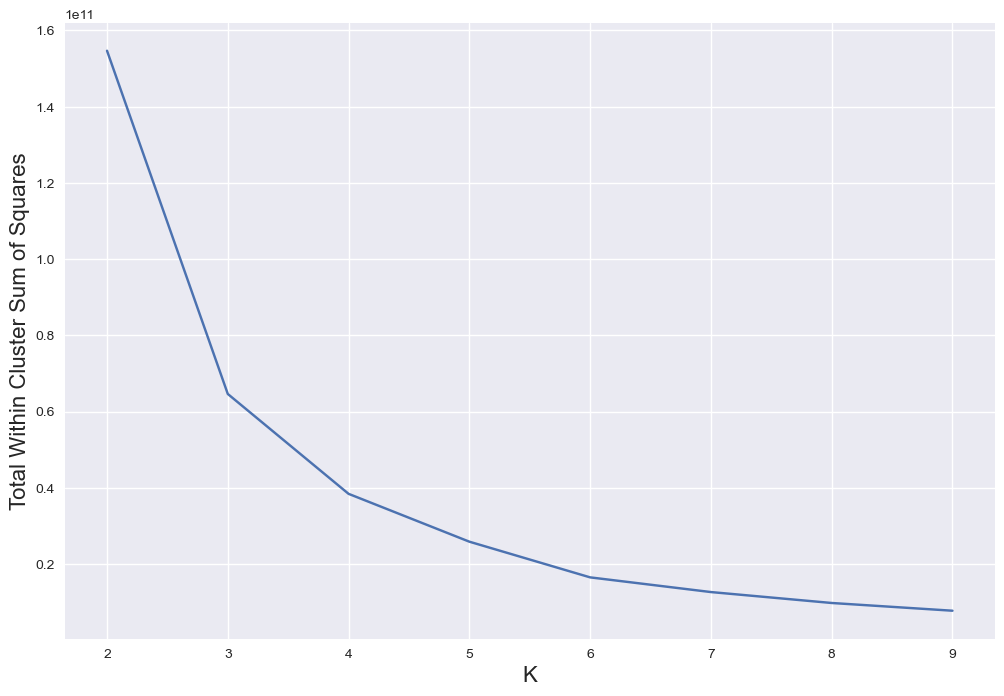

In [18]:
# YOUR CODE HERE
inertias = []
K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(q25)
    inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, inertias)
plt.xlabel('K', size=16)
plt.ylabel('Total Within Cluster Sum of Squares', size=16)
plt.show()


#### 2.5.3) *For COMP6420 Students*: Use the Silhouette method that we covered in Lecture 10 to find the optimal **k**. Show the plot of Silhouette width with respect to **k**. (Marks will not be counted unless you are a COMP6420 student)
<span style= 'float: right;'><b>[8 marks]</b></span>


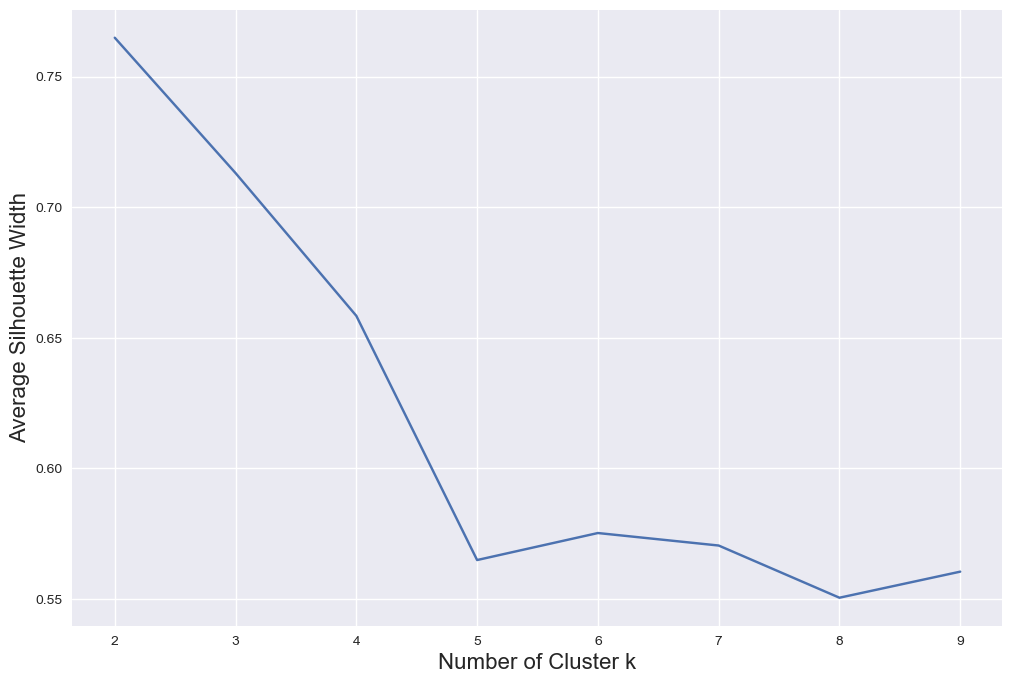

In [19]:
# YOUR CODE HERE
def disSum(d, clus):
    return np.sum([pairwise_distances(d.reshape(1,-1), clus)])
def disMean(d, clus):
    return disSum(d,clus)/len(clus)
def sil(d, label, clusList):
    a = disSum(d, clusList[label]) / (len(clusList[label])-1)
    b = np.min([disMean(d, clusList[i]) for i in range(len(clusList)) if i!=label])
    return (b-a)/np.max([a,b])

sils = []
K = range(2, 10)

for k in K:
   # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(q25)
    pred = kmeanModel.predict(q25)
    clusList = [q25[pred==i] for i in range(k)]
    sils.append(np.mean([sil(d, label, clusList) for d, label in zip(q25.values, pred)]))

plt.figure(figsize=(12,8))
plt.plot(K, sils)
plt.xlabel('Number of Cluster k', size=16)
plt.ylabel('Average Silhouette Width', size=16)
plt.show()